In [1]:
import pandas as pd

In [2]:
df_AeroSURE_m_d = pd.read_csv(r'C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\AeroSURE-m-1d.csv')
df_AeroSURE_m_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    3722 non-null   object 
 1   humidity     3722 non-null   float64
 2   pm_10        3722 non-null   float64
 3   pm_2_5       3722 non-null   float64
 4   temperature  3722 non-null   float64
dtypes: float64(4), object(1)
memory usage: 145.5+ KB


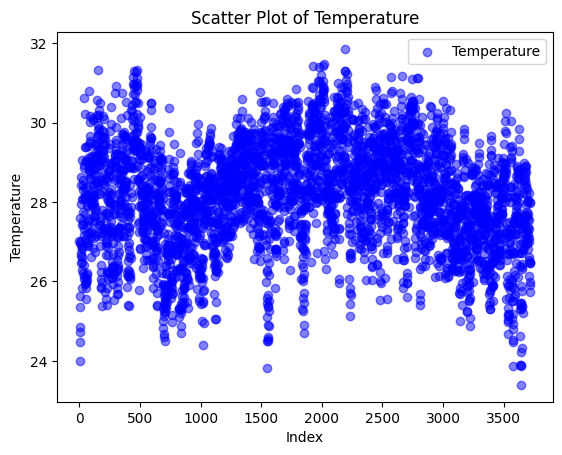

In [3]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df_AeroSURE_m_d.index  
y = df_AeroSURE_m_d["temperature"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Scatter Plot of Temperature")
plt.legend()
plt.show()



In [13]:
print(df_AeroSURE_m_d.dtypes)


timestamp      datetime64[ns]
humidity              float64
pm_10                 float64
pm_2_5                float64
temperature           float64
dtype: object


In [14]:
import pandas as pd
from scipy.stats import zscore

# อ่านไฟล์ CSV
file_path = r"C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\aerosure_wifi_m-1d.csv"
df = pd.read_csv(file_path)

# แปลง timestamp ให้เป็น datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# ลบค่า Outliers ที่เกิน 3 Z-score
z_scores = df.select_dtypes(include=["number"]).apply(zscore)
df_cleaned = df[(z_scores < 3).all(axis=1)]

# สร้างคอลัมน์ "date" แทน timestamp (เพื่อป้องกันชื่อซ้ำ)
df_cleaned["date"] = df_cleaned["timestamp"].dt.date

# รวมข้อมูลโดยใช้ค่ามัธยฐานของแต่ละวัน
df_grouped = df_cleaned.groupby("date").median().reset_index()

# บันทึกทับไฟล์เดิม
df_grouped.to_csv(file_path, index=False)

print("✅ บันทึกไฟล์เรียบร้อย:", file_path)


✅ บันทึกไฟล์เรียบร้อย: C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\aerosure_wifi_m-1d.csv


C:\Users\snpdp\AppData\Local\Temp\ipykernel_13420\1821269608.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["date"] = df_cleaned["timestamp"].dt.date


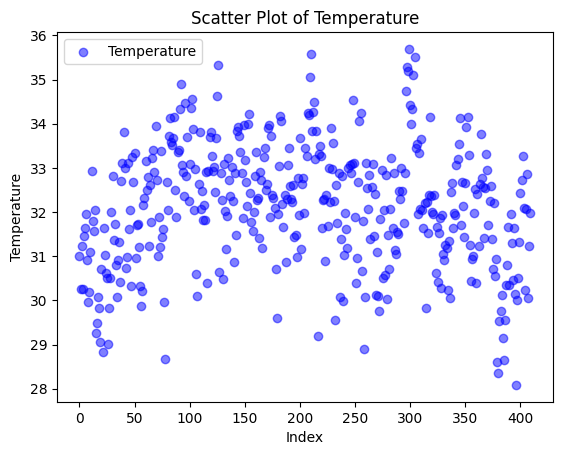

In [16]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df_grouped.index  
y = df_grouped["temperature"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Scatter Plot of Temperature")
plt.legend()
plt.show()

In [2]:
import pandas as pd

def remove_outliers_iqr(df, col_list, k=1.5):
    """
    ลบ outliers ของคอลัมน์ตามรายชื่อใน col_list
    โดยใช้ Interquartile Range (IQR) และตัวคูณ k
    """
    df_clean = df.copy()
    for col in col_list:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k*IQR
        upper_bound = Q3 + k*IQR

        # ลบแถวที่ค่าอยู่ต่ำกว่า lower_bound หรือสูงกว่า upper_bound
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# ---------- เริ่มต้นกระบวนการ Clean ข้อมูล --------------

# 1) อ่านไฟล์ CSV
file_path = r"C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\AeroSURE-m-1d.csv"  # แก้ไขเป็น path ที่ต้องการ
df = pd.read_csv(file_path)

# 2) แปลง timestamp เป็น datetime + เรียงข้อมูลตามเวลา
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)

# 3) ลบ Outliers (เลือกคอลัมน์ที่ต้องการ)
num_cols = ['humidity', 'pm_10', 'pm_2_5', 'temperature']
df_no_outliers = remove_outliers_iqr(df, num_cols, k=1.5)

# 4) สร้าง Daily Aggregation (ถ้าต้องการข้อมูลสรุปรายวัน)
df_no_outliers['date_only'] = df_no_outliers['timestamp'].dt.date
daily_df = df_no_outliers.groupby('date_only').agg({
    'humidity': 'mean',
    'pm_10': 'mean',
    'pm_2_5': 'mean',
    'temperature': 'mean'
}).reset_index()

# 5) บันทึกข้อมูลเป็นไฟล์ CSV (จะเป็นข้อมูลที่สะอาด + สรุปรายวัน)
output_path = r"C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\AeroSURE-m-1d.csv"  # แก้ได้ตามต้องการ
daily_df.to_csv(output_path, index=False)

print("Cleaning & Aggregation Complete!")
print(f"Final file saved to: {output_path}")


Cleaning & Aggregation Complete!
Final file saved to: C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\AeroSURE-m-1d.csv


In [5]:
import pandas as pd

# 1) อ่านไฟล์ CSV
df = pd.read_csv(r"C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\AeroSURE-m-1d.csv")

# 2) แปลงคอลัมน์วันที่ให้เป็น datetime และตั้งให้เป็น Index
df['date_only'] = pd.to_datetime(df['date_only'])
df = df.set_index('date_only').sort_index()

# 3) สร้างช่วงวันจากวันที่แรกถึงวันที่สุดท้าย ด้วยความถี่รายวัน
all_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# 4) Reindex เพื่อเติมวันที่ที่ขาด
df_reindexed = df.reindex(all_days)

# 5) เติมค่า (ในที่นี้ใช้ Forward fill)
df_filled = df_reindexed.ffill()

# ตรวจสอบว่าวันที่ไหนที่เคยหายไปแล้วถูกเติม
missing_days = all_days.difference(df.index)
print("Missing Days:")
print(missing_days)

print("\nตัวอย่างข้อมูลที่ถูกเติม:")
print(df_filled.loc[missing_days])

output_path = r"C:\Users\snpdp\pm2.5-Forecast-Dashboard\Data_csv\merge_data\AeroSURE-m-1d.csv"  # แก้ได้ตามต้องการ
df_filled.to_csv(output_path, index=False)


Missing Days:
DatetimeIndex(['2021-12-17', '2022-03-12', '2022-03-13', '2022-04-13'], dtype='datetime64[ns]', freq=None)

ตัวอย่างข้อมูลที่ถูกเติม:
             humidity      pm_10     pm_2_5  temperature
2021-12-17  76.233511  27.619457  24.860126    28.975256
2022-03-12  76.938964  22.726484  20.536517    29.322952
2022-03-13  76.938964  22.726484  20.536517    29.322952
2022-04-13  80.296170  26.525986  23.704785    29.217287
